In [4]:
  %%javascript

    // apply setting to all current CodeMirror instances
    IPython.notebook.get_cells().map(
        function(c) {  return c.code_mirror.options.indentWithTabs=true;  }
    );

    // make sure new CodeMirror instances created in the future also use this setting
    CodeMirror.defaults.indentWithTabs=true;



<IPython.core.display.Javascript object>


https://www.analyticsvidhya.com/blog/2016/09/solutions-data-science-in-python-skilltest/

Comparing Pandas with R: https://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html

QUICK barplot: train.Category.value_counts().plot(kind='bar') 


QUICK STACKED BARPLOT: train.unstack().plot(kind='bar',stacked=True, color=['red','blue'], grid=False)

QUICK PLOT WITH COLOR INTENSITY CODED with Count: plt.scatter(train.temp,train.atemp,alpha=1,c=train.Count,s=20)
QUICK BOXPLOT: train.boxplot(column='temp', by='season')

QUICK AUTOCORRELATION PLOT:
pd.tools.plotting.autocorrelation_plot(train.temp)


Finding features not present in train:
set(test.columns).difference(set(train.columns))

Checking if all values of product_id in test present in train?
set(test.Product_ID.unique()).issubset(set(train.Product_ID.unique()))


## AB-TESTING <a class="anchor" id="intro-bullet"></a>

A/B testing on the Web is similar. You have two designs of a website: A and B. Typically, A is the existing design (called the control), and B is the new design. You split your website traffic between these two versions and measure their performance using metrics that you care about (conversion rate, sales, bounce rate, etc.). In the end, you select the version that performs best.

What To Test? Link
Your choice of what to test will obviously depend on your goals. For example, if your goal is to increase the number of sign-ups, then you might test the following: length of the sign-up form, types of fields in the form, display of privacy policy, “social proof,” etc. The goal of A/B testing in this case is to figure out what prevents visitors from signing up. Is the form’s length intimidating? Are visitors concerned about privacy? Or does the website do a bad job of convincing visitors to sign up? All of these questions can be answered one by one by testing the appropriate website elements.

Even though every A/B test is unique, certain elements are usually tested:

The call to action’s (i.e. the button’s) wording, size, color and placement,
Headline or product description,
Form’s length and types of fields,
Layout and style of website,
Product pricing and promotional offers,
Images on landing and product pages,
Amount of text on the page (short vs. long).
Create Your First A/B Test Link


Once you’ve decided what to test, the next step, of course, is to select a tool for the job. If you want a free basic tool and don’t mind fiddling with HTML and JavaScript, go with **Google Website Optimizer**. If you want an easier alternative with extra features, go with **Visual Website Optimizer** (disclaimer: my start-up). . Setting up the core test is more or less similar for all tools, so we can discuss it while remaining tool-agnostic.

You can set up an A/B test in one of two ways:

Replace the element to be tested before the page loads. If you are testing a single element on a Web page—say, the sign-up button—then you’ll need to create variations of that button (in HTML) in your testing tool. When the test is live, the A/B tool will randomly replace the original button on the page with one of the variations before displaying the page to the visitor.
Redirect to another page. If you want to A/B test an entire page—say, a green theme vs. a red theme—then you’ll need to create and upload a new page on your website. For example, if your home page is http://www.example.com/index.html, then you’ll need to create a variation located at http://www.example.com/index1.html. When the test runs, your tool will redirect some visitors to one of your alternate URLs.
Once you have set up your variations using one of these two methods, the next step is to set up your conversion goal. Typically, you will get a piece of JavaScript code, which you would copy and paste onto a page that would represent a successful test were a visitor to arrive there. For example, if you have an e-commerce store and you are testing the color of the “Buy now” button, then your conversion goal would be the “Thank you” page that is displayed to visitors after they complete a purchase.


We develop your responsive layouts

Cutting-edge data exploration
As soon as a conversion event occurs on your website, the A/B testing tool records the variation that was shown to the visitor. After a sufficient number of visitors and conversions, you can check the results to find out which variation drove the most conversions. That’s it! Setting up and running an A/B test is indeed quite simple.

# Text Analytics <a class="anchor" id="0-bullet"></a>

[Go through this material to get started](https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk)

It's not always necessary to use regular expressions. If we have a string object, then we can use the str.methods in the following way e.g. 

when want to know how many of names have "Mr" contained in them then convert that Series object to string by calling the seriesobject.str and then the string method

OR

When you want to find records that start with F, then
train.Item_Identifier.str.startswith('F')



In [94]:
print(type(train.Name.str))
(train.Name.str.find('Mr.')>0).sum() # notice string conversion like object.str


<class 'pandas.core.strings.StringMethods'>


517

## N-grams 
You want to write a generic code to calculate n-gram of the text. The 2-gram of this sentence would be  [["this, "is"], ["is", "a"], ["a, "sample"], ["sample", "text"]]

In [19]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 6
sixgrams = ngrams(sentence.split(), n)
for grams in sixgrams:
    print(grams)

('this', 'is', 'a', 'foo', 'bar', 'sentences')
('is', 'a', 'foo', 'bar', 'sentences', 'and')
('a', 'foo', 'bar', 'sentences', 'and', 'i')
('foo', 'bar', 'sentences', 'and', 'i', 'want')
('bar', 'sentences', 'and', 'i', 'want', 'to')
('sentences', 'and', 'i', 'want', 'to', 'ngramize')
('and', 'i', 'want', 'to', 'ngramize', 'it')


## Basics of Counting (Collections)  <a class="anchor" id="01-bullet"></a>
Even simple text analytics cannot use dictionary so easily -- use COLLECTIONS MODULE AND COUNTER OBJECTS TO COUNT SOMETHING!

TASK: COUNT THE AMOUNT OF WORDS IN A REVIEW AND STORE THE COUNTS

In [18]:
from collections import Counter
z = ['blue', 'red', 'blue', 'yellow', 'blue', 'red']
a = Counter(z)
a.get('blue')
a.keys()

dict_keys(['blue', 'red', 'yellow'])

In [19]:
reviews = ['movie is unwatchable no matter how decent the first half is  . ', 'somewhat funny and well  paced action thriller that has jamie foxx as a hapless  fast  talking hoodlum who is chosen by an overly demanding', 'morse is okay as the agent who comes up with the ingenious plan to get whoever did it at all cost .']
len(reviews)
from collections import Counter
counts = Counter() # initiate the counter dictionary

for i in range(len(reviews)): # for each review
    for word in reviews[i].split(' '): # split all reviews on whitespace
        counts[word] += 1 # count the words

counts


Counter({'': 5,
         '.': 2,
         'a': 1,
         'action': 1,
         'agent': 1,
         'all': 1,
         'an': 1,
         'and': 1,
         'as': 2,
         'at': 1,
         'by': 1,
         'chosen': 1,
         'comes': 1,
         'cost': 1,
         'decent': 1,
         'demanding': 1,
         'did': 1,
         'fast': 1,
         'first': 1,
         'foxx': 1,
         'funny': 1,
         'get': 1,
         'half': 1,
         'hapless': 1,
         'has': 1,
         'hoodlum': 1,
         'how': 1,
         'ingenious': 1,
         'is': 4,
         'it': 1,
         'jamie': 1,
         'matter': 1,
         'morse': 1,
         'movie': 1,
         'no': 1,
         'okay': 1,
         'overly': 1,
         'paced': 1,
         'plan': 1,
         'somewhat': 1,
         'talking': 1,
         'that': 1,
         'the': 3,
         'thriller': 1,
         'to': 1,
         'unwatchable': 1,
         'up': 1,
         'well': 1,
         'who': 2,
    

## RegExp <a class="anchor" id="02-bullet"></a>


In [20]:
txt = '''450
 00:17:53,457 --> 00:17:56,175
 Okay, but, um,
 thanks for being with us.

451
 00:17:56,175 --> 00:17:58,616
 But, um, if there's any
 college kids watching,

452
 00:17:58,616 --> 00:18:01,610
 But, um, but, um, but, um,
 but, um, but, um,

453
 00:18:01,610 --> 00:18:03,656
 We have to drink, professor.
454
 00:18:03,656 --> 00:18:07,507
 It's the rules.
 She said "But, um"

455
 00:18:09,788 --> 00:18:12,515
 But, um, but, um, but, um...
 god help us all.
 '''
 
import re

a2 = len(re.findall('[B,b]ut, um', txt)) # right answer 
a2

11

(?<=...)
Matches if the current position in the string is preceded by a match for
... that ends at the current position. This is called a positive lookbehind 
assertion. (?<=abc)def will find a match in abcdef, since the lookbehind 
will back up 3 characters and check if the contained pattern matches

In [67]:
# regexpressions basics
import re
m = re.search('(?<=abc)def', 'abcdefi')
m.group(0)

#pattern = re.compile("d")
re.search("d",'dog') # match at index 0


<_sre.SRE_Match object; span=(0, 1), match='d'>

In [44]:
# This example looks for a word following a hyphen:
m = re.findall('(?<=-)\w+', 'spam-egg-mustard') # preceding dash
m

['egg', 'mustard']

In [78]:
m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")
m.group(0) # entire match

m.group(1)       # The first parenthesized subgroup.
'Isaac'
m.group(2)       # The second parenthesized subgroup.
'Newton'
m.group(1, 2)    # Multiple arguments give us a tuple.
('Isaac', 'Newton')

('Isaac', 'Newton')

In [ ]:
(?P<name>...)
Similar to regular parentheses, but the substring matched by the group 
is accessible via the symbolic group name name. 
Group names must be valid Python identifiers, and each group name
must be defined only once within a regular expression. 
A symbolic group is also a numbered group, just as if the group were not named.

In [17]:
# Example :
m = re.match(r"(?P<first_name>\w+) (?P<last_name>\w+)", "Malcolm Reynolds")
m.group('first_name')
'Malcolm'
m.group('last_name')
'Reynolds'

'Reynolds'

## Extracting Email Domain Names


In [18]:
import re
str ="""Email_Address,Nickname,Group_Status,Join_Year
aa@aaa.com,aa,Owner,2014
bb@bbb.com,bb,Member,2015
cc@ccc.com,cc,Member,2017
dd@ddd.com,dd,Member,2016
ee@eee.com,ee,Member,2020"""

for i in re.finditer('([a-zA-Z]+)@([a-zA-Z]+).(com)', str):
    print(i.group(2))
    
string = 'hiseail blabla is mailto:tom_142@gmail.com please mail'
match=re.findall(r"[\w_]+@[\w.]+",string)
match

aaa
bbb
ccc
ddd
eee


['tom_142@gmail.com']

## Extracting y sounding ending words

In [ ]:
import re
pattern = '(i$|ie$)(,)' # finds i or ie endings !
temp = []
for i in re.finditer(pattern, str):
    temp.append(i.group(1))

# Exploring data : Pivot  and CrossTable, Ratios and Distributions <a class="anchor" id="1.1-bullet"></a>
**Create a pivot table to see how the distribution of Hours per Week changes as a function of Marital Status and Occupation**
Assumes that pandas dataframe 'train' has been created. Then:

train.pivot_table(index='Marital.Status', columns='Occupation', values='Hours.Per.Week', aggfunc='sum')

**see the distribution of the relationship feature**

train['Relationship_Percentage'] = train.Relationship.map(train.Relationship.value_counts()/train.shape[0])

In [2]:
import os
import pandas as pd
os.chdir("")
data_path = os.path.abspath(
    os.path.join(
        'data',
        'titanic.csv'
    )
)

data = pd.read_csv(data_path)
data.info()

pd.crosstab(titanic['Pclass'],titanic['Survived'])
titanic.pivot_table(index='Pclass',columns='Survived',values="Parch",aggfunc='count')
train['Pclass_percentage']=train.Pclass.map(train.Pclass.value_counts()/train.shape[0])
train.head()
titanic = pd.read_csv("/home/data/pCloudDrive/W/dl_projects_combined/ml_for_python_2019_/exams/exam1_computer/data/titanic.csv")

In [32]:

#titanic.columns
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [36]:
# PIVOT TABLE
titanic.pivot_table(index='Pclass',columns='Survived',values="Parch",aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [100]:
train['Pclass_percentage']=train.Pclass.map(train.Pclass.value_counts()/train.shape[0])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Cabin,Pclass_percentage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.551066
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.242424
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.551066
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.242424
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.551066


In [186]:
df.head()

,id,view,value
0,1,A,0.543405
3,2,A,0.844776
5,3,A,0.121569
9,4,B,0.575093
11,5,B,0.209202


## Exploring Data: QUICK Plotting <a class="anchor" id="1.2-bullet"></a>
Source for Pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html

##  Exploring Data: Scatter Plot <a class="anchor" id="1.2.1-bullet"></a>


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


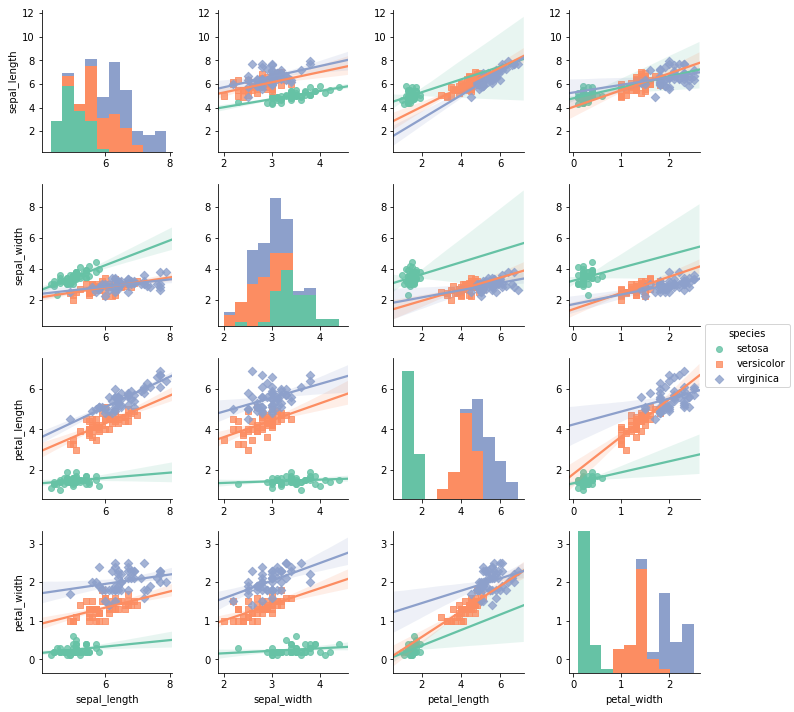

In [204]:
# also interactive plots with Plotly: https://plot.ly/python/line-and-scatter/
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
print(df.head())
# with regression
sns.pairplot(df, kind="reg", hue="species", markers=["o", "s", "D"], palette="Set2") # kind = 'scatter'
plt.show()



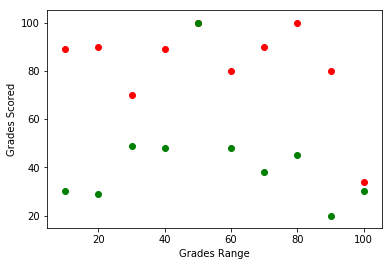

In [203]:
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.scatter(grades_range, girls_grades, color='r')
plt.scatter(grades_range, boys_grades, color='g')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()


## Exploring Data: Histogram <a class="anchor" id="1.2.2-bullet"></a>

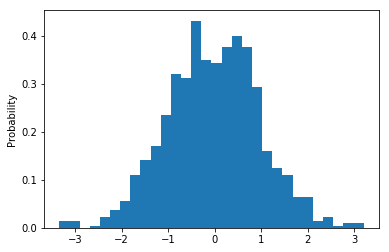

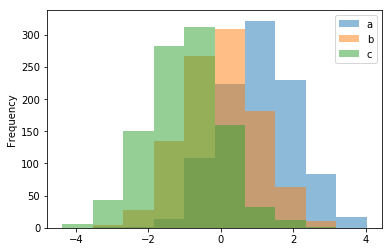

In [245]:
train.head()
plt.gcf().clear()

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');


# or using directly PANDAS

df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df4.plot.hist(alpha=0.5)

##  Exploring Data: TIME SERIES / LINE PLOTS <a class="anchor" id="1.2.3-bullet"></a>

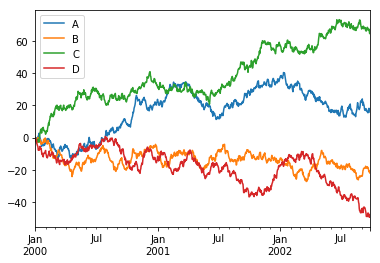

In [234]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
data = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

data.sum = data.cumsum()

%matplotlib inline
data.sum.plot();



## Exploring Data: BARPLOTS <a class="anchor" id="1.2.4-bullet"></a>

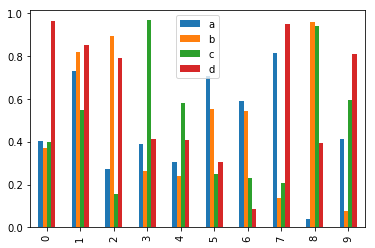

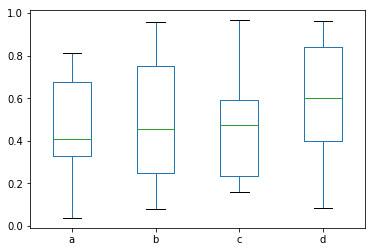

In [253]:
%matplotlib inline
bardata = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
bardata.plot.bar();
bardata.plot.box();

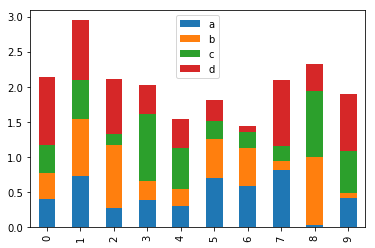

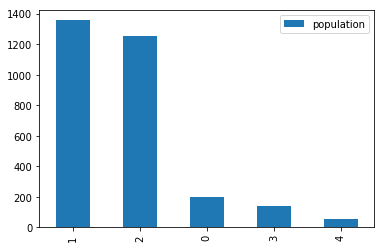

In [273]:
bardata.plot.bar(stacked=True)
import matplotlib.pyplot as plt
brics_g = brics.groupby(['country']).population.sum().reset_index().sort_values('population',ascending=False)
brics_g.plot(kind='bar',stacked=True)
plt.show()

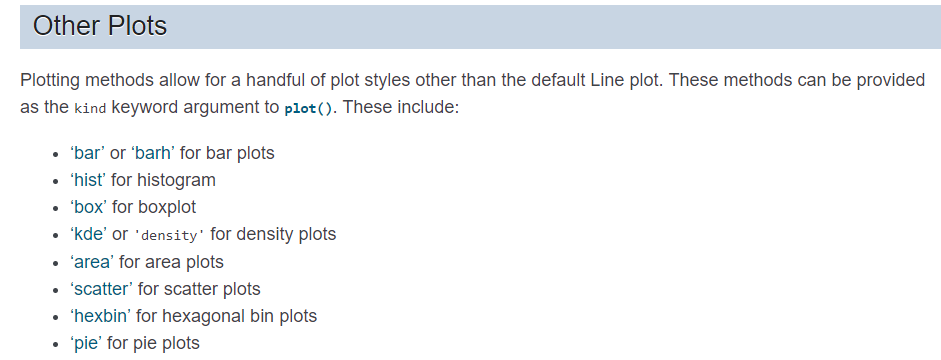

In [241]:
from IPython.display import Image
Image(filename='otherplots.PNG')

In [ ]:
fig=plt.figure()
for i in range(0,7):
    fig.add_subplot(3,3,i)
    t1=train[train['day']==i]      
    t1.groupby(['hour'])['count'].sum().plot(kind='bar')

## Skewness <a class="anchor" id="2.1-bullet"></a>

In [42]:

# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.skew.html
# use Pearson's skewness coefficient to calculate skewness
train.skew() # gives the skews of all the features

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

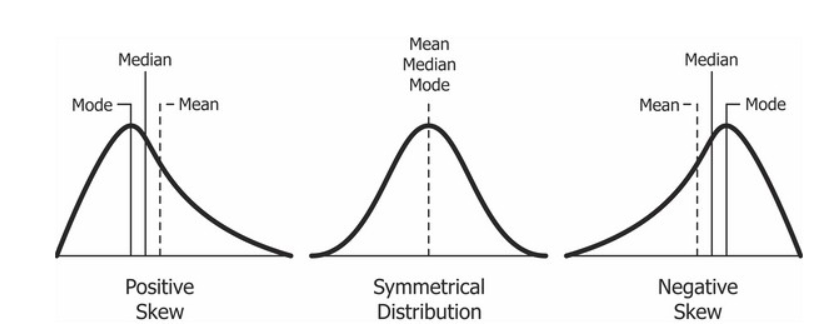

In [3]:
from IPython.display import Image
Image('https://filedn.com/lK1VhM9GbBxVlERr9KFjD4B/img/skewness.PNG')

##  Kurtosis <a class="anchor" id="2.2-bullet"></a>

Kurtosis measures whether your dataset is heavy-tailed or light-tailed compared to a normal distribution.

Data sets with high kurtosis have heavy tails and more outliers and data sets with low kurtosis tend to have light tails and fewer outliers.

In [1]:
from scipy.stats import kurtosis 
y = [1,7,3,2,7,9]
kurtosis(y)

-1.6304471136144254

# Functional Programming and  Recursive Algorithms


## Recursive Algorithms

In [ ]:
def reverseList(L):

    # Empty list
    if len(L) == 0:
        return

    # List with one element
    if len(L) == 1:

        # Check if that's a list
        if isinstance(L[0], list):
            return [reverseList(L[0])]
        else:
            return L

    # List has more elements
    else:
        # Get the reversed version of first list as well as the first element
        return reverseList(L[1:]) + reverseList(L[:1])





list2d = [[1,2],[3,4],[5,6],[7,8]]

list3d = [list2d, [[0,2],[3,4],[5,6],[7,8]]]

list4d = [list3d, list(reversed(list3d))]

## Functional Programming and Decorators

In [ ]:
from functools import wraps
def log_function_data(fn):
    @wraps(fn)
    def wrapper(*args, **kwargs):
        """I AM WRAPPER FUNCTION"""
        print(f"you are about to call {fn.__name__}")
        print(f"Here's the documentation: {fn.__doc__}")
        return fn(*args, **kwargs)
    return wrapper


@log_function_data
def add(x,y):
    """Adds two numbers together."""
    return x + y

print(add.__doc__)
print(add.__name__)
help(add)


In [11]:
from functools import wraps


def retry(func):
    def retried_function(*args, **kwargs):
        exc = None
        for _ in range(3):
            try:
                return func(*args, **kwargs)
            except Exception as exc:
                print("Exception raised while calling %s with args:%s, kwargs: %s. Retrying" % (func, args, kwargs))
    return retried_function

@retry
def do_something_risky(*args):
    return reduce(sum,*args)

retried_function = retry(do_something_risky)  # No need to use `@`

do_something_risky(1,7)


Exception raised while calling <function do_something_risky at 0x7f794cabebf8> with args:(1, 7), kwargs: {}. Retrying
Exception raised while calling <function do_something_risky at 0x7f794cabebf8> with args:(1, 7), kwargs: {}. Retrying
Exception raised while calling <function do_something_risky at 0x7f794cabebf8> with args:(1, 7), kwargs: {}. Retrying


In [12]:


def double_return(fun):
    @wraps(fun)
    def wrapper(*args,**kwargs):
        output = fun(*args,**kwargs)
        return [output]*2
    return wrapper

@double_return
def inner_fun(name):
    print("Something actually happened")
    return f"Hi, I'm {name}"





## Reduce

In [13]:
reduce(lambda x,y:x+y,[1,2,3])



6

# Revision Questions

   - What is text analytics? What types of problems are solved there?
   - What is a recursive algorithm?
   - How do you write a recursive algorithm?
   - How to combine Pandas and Seaborn to quickly visualize data?
   - What is a pivot table?
   - What is a decorator and how to write it?
   - What is functional programming and how is it different from object oriented programming?